In [1]:
import torch

torch.manual_seed(1024)

In [2]:
x = torch.linspace(100, 200, 300)
x = (x - torch.mean(x)) / torch.std(x)
epsilon = torch.randn(x.shape)
y = 10 * x + 5 + epsilon

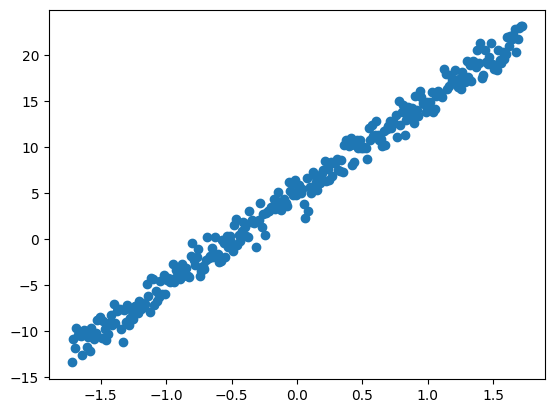

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x, y)

In [4]:
y

tensor([-13.3961, -10.8075, -11.8528,  -9.6184, -10.4426, -10.4315, -10.4689,
        -12.5440,  -9.9117,  -9.9984, -11.7509, -10.6392, -12.1117,  -9.6365,
        -10.2414, -10.8527, -10.2342,  -8.7388,  -8.6868,  -8.4204, -10.7022,
         -8.9323,  -9.7631, -10.9311, -10.2529,  -9.0773,  -8.2096,  -9.2912,
         -7.0133,  -9.1074,  -7.8029,  -7.5345,  -7.5801,  -9.7838, -11.2021,
         -7.7175,  -8.9588,  -7.1778,  -9.3528,  -8.5715,  -7.7933,  -8.6871,
         -7.2771,  -7.2377,  -7.9924,  -6.7385,  -7.5372,  -6.9353,  -7.4078,
         -7.0749,  -4.8561,  -6.1742,  -7.8895,  -4.2468,  -4.3038,  -7.1418,
         -5.5982,  -6.6931,  -6.2595,  -4.4945,  -5.9768,  -3.8734,  -5.9221,
         -4.4415,  -4.2563,  -4.6526,  -4.2992,  -2.6721,  -4.6666,  -3.2846,
         -4.0007,  -3.4749,  -4.3257,  -2.6311,  -3.9901,  -3.2775,  -3.1723,
         -3.9969,  -4.1025,  -1.8642,  -0.4277,  -2.2701,  -2.7522,  -1.9702,
         -0.9997,  -3.9899,  -3.4731,  -2.8806,  -3.1944,  -2.22

In [5]:
 from sklearn import linear_model

m = linear_model.LinearRegression()
m.fit(x.reshape(-1, 1), y)
m.coef_, m.intercept_

(array([9.965947], dtype=float32), np.float32(5.1028767))

In [6]:
#### 梯度下降法
import torch.nn as nn


class Linear(nn.Module):

    def __init__(self):
        # 定义模型参数
        super(Linear, self).__init__()
        self.a = nn.Parameter(torch.zeros(()))
        self.b = nn.Parameter(torch.zeros(()))

    def forward(self, x):
        # 前向传播
        return self.a * x + self.b

    def string(self):
        return f'y={self.a.item():.2f}*x + {self.b.item():.2f}'


In [7]:
m = Linear()
m(x)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [8]:
list(m.parameters())

[Parameter containing:
 tensor(0., requires_grad=True),
 Parameter containing:
 tensor(0., requires_grad=True)]

y=1.99*x + 1.02
y=3.58*x + 1.84
y=4.85*x + 2.49
y=5.87*x + 3.01
y=6.69*x + 3.43
y=7.34*x + 3.77
y=7.86*x + 4.03
y=8.28*x + 4.25
y=8.62*x + 4.42
y=8.89*x + 4.55
y=9.10*x + 4.66
y=9.27*x + 4.75
y=9.41*x + 4.82
y=9.52*x + 4.88
y=9.61*x + 4.92
y=9.68*x + 4.96
y=9.74*x + 4.99
y=9.78*x + 5.01
y=9.82*x + 5.03
y=9.85*x + 5.04


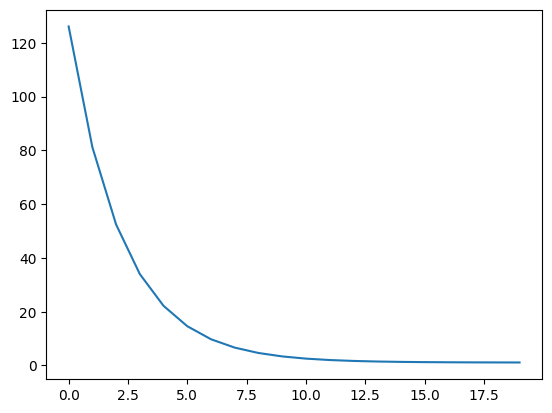

In [9]:
import torch.optim as optim

loss_list = []
learning_rate = 0.1
model = Linear()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for t in range(20):
    y_pred = model(x)
    # 定义损失
    loss = (y - y_pred).pow(2).mean()
    loss_list.append(loss.item())
    # 在计算当前梯度的时候一定要将上一步梯度清空
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 更新模型参数
    optimizer.step()
    print(model.string())

plt.plot(loss_list)

y=1.99*x + 1.02
y=3.58*x + 1.84
y=4.85*x + 2.49
y=5.87*x + 3.01
y=6.69*x + 3.43
y=7.34*x + 3.77
y=7.86*x + 4.03
y=8.28*x + 4.25
y=8.62*x + 4.42
y=8.89*x + 4.55
y=9.10*x + 4.66
y=9.27*x + 4.75
y=9.41*x + 4.82
y=9.52*x + 4.88
y=9.61*x + 4.92
y=9.68*x + 4.96
y=9.74*x + 4.99
y=9.78*x + 5.01
y=9.82*x + 5.03
y=9.85*x + 5.04


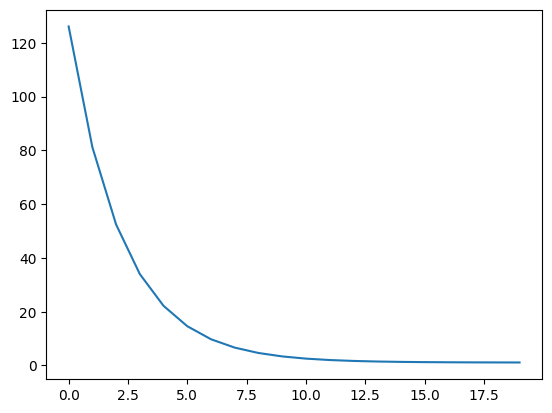

In [10]:
loss_list = []
learning_rate = 0.1
model = Linear()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for t in range(20):
    y_pred = model(x)
    # 定义损失
    loss = (y - y_pred).pow(2).mean()
    loss_list.append(loss.item())
    # 在计算当前梯度的时候一定要将上一步梯度清空
    # optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 更新模型参数
    # optimizer.step()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            param.grad = None
    print(model.string())

plt.plot(loss_list)

y=3.41*x + -2.11
y=4.00*x + -2.53
y=3.89*x + -2.43
y=3.51*x + -2.01
y=3.16*x + -1.51
y=2.85*x + -0.83
y=2.67*x + 0.02
y=2.67*x + 1.00
y=2.94*x + 2.14
y=3.55*x + 3.47
y=4.41*x + 4.69
y=5.43*x + 5.80
y=6.50*x + 6.72
y=7.42*x + 7.38
y=7.94*x + 7.70
y=9.70*x + 6.62
y=10.29*x + 6.18
y=10.51*x + 6.00
y=10.55*x + 5.95
y=10.63*x + 5.83


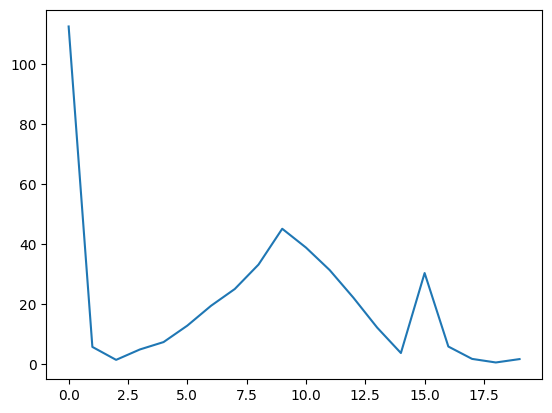

In [11]:
### 随机梯度下降法
loss_list = []
batch_size = 20
learning_rate = 0.1
model = Linear()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for t in range(20):
    ix = (t * batch_size) % len(x)
    xx = x[ix:ix + batch_size]
    yy = y[ix:ix + batch_size]
    yy_pred = model(xx)
    # 定义损失
    loss = (yy - yy_pred).pow(2).mean()
    loss_list.append(loss.item())
    # 在计算当前梯度的时候一定要将上一步梯度清空
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 更新模型参数
    optimizer.step()
    print(model.string())

plt.plot(loss_list)

y=1.00*x + -1.00
y=1.93*x + -1.95
y=2.73*x + -2.79
y=3.33*x + -3.39
y=3.75*x + -3.71
y=4.03*x + -3.75
y=4.22*x + -3.53
y=4.39*x + -3.13
y=4.58*x + -2.59
y=4.85*x + -1.93
y=5.24*x + -1.20
y=5.73*x + -0.41
y=6.34*x + 0.42
y=7.03*x + 1.28
y=7.77*x + 2.14
y=8.44*x + 2.92
y=9.04*x + 3.61
y=9.56*x + 4.22
y=10.02*x + 4.79
y=10.41*x + 5.29


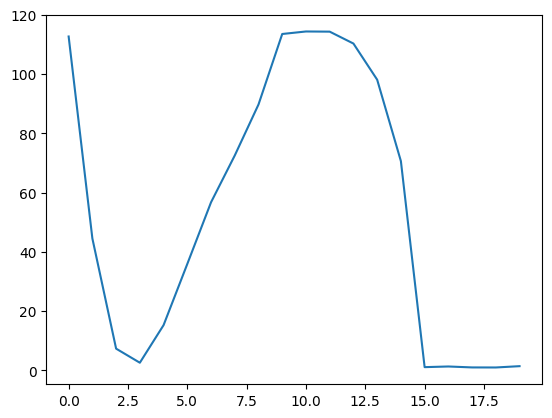

In [13]:
### 更优化的随机梯度下降法Adam
loss_list = []
batch_size = 20
learning_rate = 1
model = Linear()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

for t in range(20):
    ix = (t * batch_size) % len(x)
    xx = x[ix:ix + batch_size]
    yy = y[ix:ix + batch_size]
    yy_pred = model(xx)
    # 定义损失
    loss = (yy - yy_pred).pow(2).mean()
    loss_list.append(loss.item())
    # 在计算当前梯度的时候一定要将上一步梯度清空
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 更新模型参数
    optimizer.step()
    print(model.string())

plt.plot(loss_list)

In [15]:
#### 张量的基本操作
print(torch.zeros(2, 3))

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [16]:
print(torch.randn(4, 2))

tensor([[-0.0742,  0.0694],
        [-2.0790, -0.4774],
        [ 0.1129,  0.0147],
        [-0.8202, -1.8692]])


In [17]:
a = torch.randn(2, 3, 4)
a.shape

torch.Size([2, 3, 4])

In [18]:
a.unsqueeze(0).shape

torch.Size([1, 2, 3, 4])

In [19]:
b = a.unsqueeze(0)
b

tensor([[[[ 0.2249, -0.0543, -0.0232, -0.1009],
          [ 0.1448,  2.1733, -1.5689,  0.0620],
          [ 1.5940,  0.4691,  0.8146,  0.4624]],

         [[ 2.1187,  1.1555, -0.7440,  0.1301],
          [ 0.2118,  1.5430, -0.4090,  0.0542],
          [-1.0890,  1.1605, -0.9634,  0.9700]]]])

In [20]:
b.shape

torch.Size([1, 2, 3, 4])

In [21]:
b.squeeze(0).shape

torch.Size([2, 3, 4])

In [22]:
data = torch.tensor(range(10))
data.shape

torch.Size([10])

In [23]:
a = torch.tensor(range(1, 7)).view(2, 3)
b = torch.tensor(range(11, 17)).view(2, 3)
a.shape, b.shape

(torch.Size([2, 3]), torch.Size([2, 3]))

In [24]:
a, b, a * b

(tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([[11, 12, 13],
         [14, 15, 16]]),
 tensor([[11, 24, 39],
         [56, 75, 96]]))

In [25]:
# 广播机制
b=torch.tensor(range(1,4)).view(3)
b.shape

torch.Size([3])